In [2]:
library(ggplot2)
library(dplyr)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# create a data frame
group = c("A total", "A total", "sub x", "sub x",
           "sub y", "sub y", "B total", "B total")
year = c("2021", "2022", "2021", "2022", "2021", "2022", "2021", "2022")

df <- data.frame(group, year)

# define replicates of each row
duptimes <- c(17322, 27486, 13253, 18145, 4256, 8569, 34458, 39105)

# create index of rows with duplications
idx <- rep(1:nrow(df), duptimes)

# use index to generate data frame
df <- df[idx,]

# display data frame
head(df)

,group,year
,<chr>,<chr>
1,A total,2021
1.1,A total,2021
1.2,A total,2021
1.3,A total,2021
1.4,A total,2021
1.5,A total,2021


In [12]:
# display grouped data frame

grouped <- df |> group_by(group, year) |> summarize(n = n())
grouped

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,year,n
<chr>,<chr>,<int>
A total,2021,17322
A total,2022,27486
B total,2021,34458
B total,2022,39105
sub x,2021,13253
sub x,2022,18145
sub y,2021,4256
sub y,2022,8569


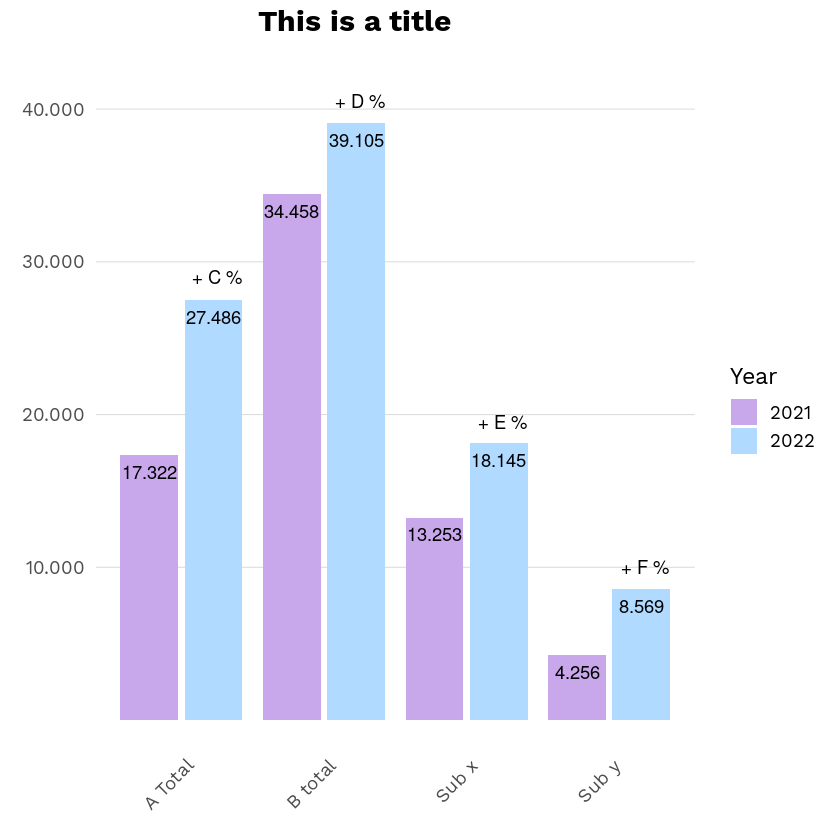

In [22]:
# data layer
ggplot(df, aes(x = group, fill = year)) +

# barplot
geom_bar(position = position_dodge2(preserve = "single", width = 1)) +

# text in bars
geom_text(aes(label = comma(after_stat(count), big.mark = ".", decimal.mark = ",")), 
          stat = "count", 
          vjust = 1.7,
          hjust = .5,
          colour = "black",
          position = position_dodge(width = .9)) +

# annotations above bars
annotate("text", x = 1.25, y = 29000, label = "+ C %") +
annotate("text", x = 2.25, y = 40500, label = "+ D %") +
annotate("text", x = 3.25, y = 19500, label = "+ E %") +
annotate("text", x = 4.25, y = 10000, label = "+ F %") +

# set general theme and font family
theme_light(base_size = 14, 
            base_family = "Work Sans") +

# fill bars with specific colors
scale_fill_manual(values = c("#C9A7EB","#B0DAFF")) +

# set plot title and legend title
labs(title = "This is a title",
     fill = "Year",
     x = element_blank(), 
     y = element_blank()) +

# change the default x labels in order to insert line break
scale_x_discrete(labels = c("A Total",
                            "B total",
                            "Sub x",
                            "Sub y")) +

# format numbers of y-label with big.mark "."
scale_y_continuous(labels = label_number(big.mark = ".",
                                         decimal.mark = ","),
                   breaks = c(10000,20000,30000,40000)) +

# specify further theme elements
theme(panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.y = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(face = 'bold',
                              size = 18,
                              margin = margin(0,0,20,0), hjust = .4),
      axis.text.x = element_text(angle = 45, vjust = 1, hjust = .9))

In [19]:
# export image

ggsave(("barplot_example.png"), 
device = "png", units = "cm", width = 20, height = 19)

ggsave(("barplot_example.jpg"), 
device = "jpg", units = "cm", width = 20, height = 19)